In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [3]:
#mount with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Data preprocessing **




In [4]:
#Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv')#(df(dataframe) is that format which undertood to pandas )
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
 #check data types ares correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#check missing values
missing_values=df.isnull().sum()
print("Missing Values", missing_values)

missing_value_percentage= (missing_values/len(df))  * 100
print("Missing values in percentage",missing_value_percentage )

Missing Values gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Missing values in percentage gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [11]:
#Encode categorical variables using one-hot encoding or label encoding
df_encoded = pd.get_dummies(df, drop_first=True)    # i am using one-hot encoding because accoring to me its suited for all columns
df_encoded

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,False,False,False,False,True,False,False,True,False,False,True,False
996,62,55,55,True,False,True,False,False,False,True,False,False,False,False,True
997,59,71,65,False,False,True,False,False,False,True,False,False,False,False,False
998,68,78,77,False,False,False,True,False,False,False,False,True,False,True,False


In [12]:
# Normalize or standardize features (optional but recommended).

scaler = MinMaxScaler()
# numerical columns to normalize
numerical_cols = ['math score', 'reading score', 'writing score']
# Apply Min-Max normalization
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [13]:
df_encoded

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.72,0.662651,0.711111,False,True,False,False,False,True,False,False,False,False,True,True
1,0.69,0.879518,0.866667,False,False,True,False,False,False,False,False,True,False,True,False
2,0.90,0.939759,0.922222,False,True,False,False,False,False,False,True,False,False,True,True
3,0.47,0.481928,0.377778,True,False,False,False,False,False,False,False,False,False,False,True
4,0.76,0.734940,0.722222,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.88,0.987952,0.944444,False,False,False,False,True,False,False,True,False,False,True,False
996,0.62,0.457831,0.500000,True,False,True,False,False,False,True,False,False,False,False,True
997,0.59,0.650602,0.611111,False,False,True,False,False,False,True,False,False,False,False,False
998,0.68,0.734940,0.744444,False,False,False,True,False,False,False,False,True,False,True,False


# **2. Feature Engineering**

In [ ]:
# Choose relevant features to predict math score.

# all original columns in this dataset are highly relevant for predicting math score.


In [14]:
# Create interaction or polynomial features (only for Polynomial Regression part).

# Only apply polynomial transformation to numerical features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Select only numerical features for polynomial expansion
numerical_cols = ['reading score', 'writing score']
X_numerical = df_encoded[numerical_cols]

# Generate polynomial & interaction terms
X_poly = poly.fit_transform(X_numerical)

# Optional: combine with other features (e.g., one-hot encoded categorical features)
import numpy as np
X_combined = np.hstack((X_poly, df_encoded.drop(['math score'] + numerical_cols, axis=1).values))

# **Model Building and Evaluation**

In [32]:
# Split the data into training and test sets (80/20).


X_linear = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_linear, y, test_size=0.2, random_state=42)

In [33]:
# Scaling features using StandardScaler
scaler_lin = StandardScaler()
X_train_lin_scaled = scaler_lin.fit_transform(X_train_lin)
X_test_lin_scaled = scaler_lin.transform(X_test_lin)

In [35]:
# Training Linear Regression model on scaled features
linear_model = LinearRegression()
linear_model.fit(X_train_lin_scaled, y_train_lin)

LinearRegression()

In [37]:
# Predicting on test data
y_pred_lin = linear_model.predict(X_test_lin_scaled)


In [38]:
# Evaluation metrics
print("📘 Multiple Linear Regression:")
r2 = r2_score(y_test_lin, y_pred_lin)
n = X_test_lin.shape[0]     # number of samples
p = X_test_lin.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test_lin, y_pred_lin)
mae = mean_absolute_error(y_test_lin, y_pred_lin)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

📘 Multiple Linear Regression:
✅ R² Score: 0.8804
✅ Adjusted R² Score: 0.8714
📉 Mean Squared Error (MSE): 0.0029
📉 Mean Absolute Error (MAE): 0.0421
📉 Root Mean Squared Error (RMSE): 0.0539


In [40]:
#****************************************************************Ploynimial Regression*******************************************
# Train-test split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train_poly_scaled, y_train_poly)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test_poly_scaled)

# Evaluation metrics
print("📘 Polynomial Regression:")
r2 = r2_score(y_test_poly, y_pred_poly)
n = X_test_poly.shape[0]     # number of samples
p = X_test_poly.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test_poly, y_pred_poly)
mae = mean_absolute_error(y_test_poly, y_pred_poly)
rmse = np.sqrt(mse)

print("\n📗 Polynomial Regression (degree=2):")
print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")


📘 Polynomial Regression:

📗 Polynomial Regression (degree=2):
✅ R² Score: 0.8812
✅ Adjusted R² Score: 0.8701
📉 Mean Squared Error (MSE): 0.0029
📉 Mean Absolute Error (MAE): 0.0418
📉 Root Mean Squared Error (RMSE): 0.0538


<ipython-input-42-4e7f29c8af21>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


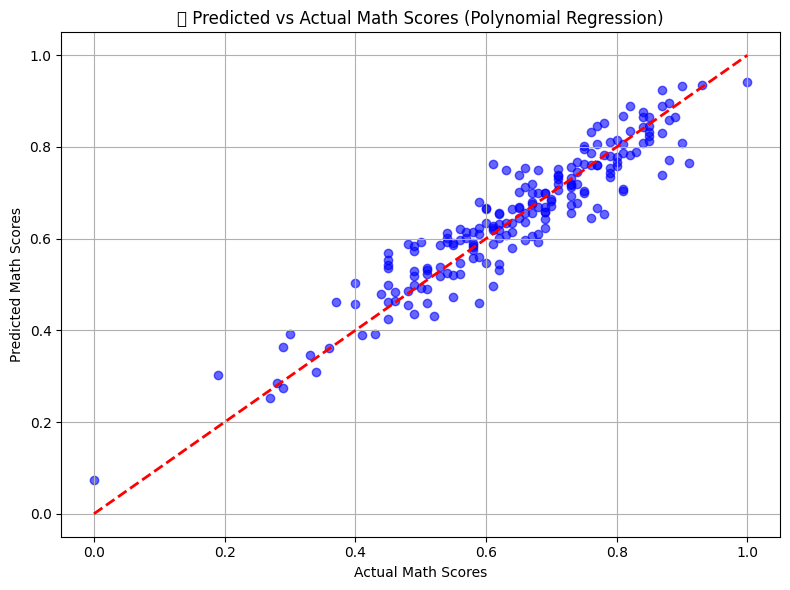

In [42]:
# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, color='blue', alpha=0.6)
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'r--', lw=2)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("📊 Predicted vs Actual Math Scores (Polynomial Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# This plot visually confirms that this Polynomial Regression model has learned the
# relationship between features and math score quite well. The predictions are generally
# in good agreement with the actual scores. This is a positive sign for this model's performance.

<ipython-input-43-548dd4e78da4>:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


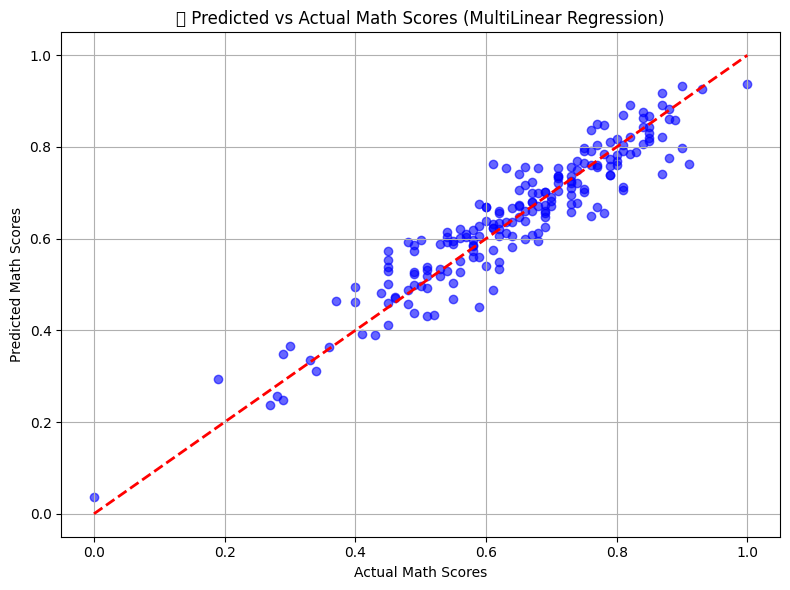

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_lin, y_pred_lin, color='blue', alpha=0.6)
plt.plot([y_test_lin.min(), y_test_lin.max()], [y_test_lin.min(), y_test_lin.max()], 'r--', lw=2)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("📊 Predicted vs Actual Math Scores (MultiLinear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()
# This plot visually confirms that this Polynomial Regression model has learned the
# relationship between features and math score quite well. The predictions are generally
# in good agreement with the actual scores. This is a positive sign for this model's performance.

In [45]:
# Discuss overfitting or underfitting in Polynomial Regression
# Predict on training data
y_train_pred_poly = poly_model.predict(X_train_poly_scaled)

# Training set metrics
train_r2 = r2_score(y_train_poly, y_train_pred_poly)
train_mse = mean_squared_error(y_train_poly, y_train_pred_poly)
train_rmse = np.sqrt(train_mse)

print("\n📘 Training Set Evaluation:")
print(f"✅ R² Score: {train_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {train_mse:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {train_rmse:.4f}")

#This looks like a good fit — this model is generalizing well and not significantly overfitting.


📘 Training Set Evaluation:
✅ R² Score: 0.8755
📉 Mean Squared Error (MSE): 0.0028
📉 Root Mean Squared Error (RMSE): 0.0530
